# Лабораторная работа №7 
***Выполнил студент группы А-05-20 Ходосевич Л.Н.***  
**Вариант 24**

## Задача 7.1  

Найти приблеженное решение задачи Коши из таблицы с точноостью
$
\varepsilon={10}^{-6}
$  
#### Порядок решения задачи:
1. Найти решение задачи Коши  с фиксированным шагом  h=0.01 методом Эйлера и методом индивидуального варианта (Интерполяционный метод адамса 2 порядка).
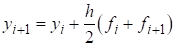
2. Построить графики полученных  решений задачи.                                                                                                 
3. Найти решение той же задачи с заданной точностью. Построить графики решения и сравнить с п.2.   


#### Задача Коши:
$$
\left\{\begin{matrix}
y' = f(t, y)
\\
f(t) = -25y - 40cos(t) + 15sin(t) - 12
\\
0 \leq t \leq 2 
\\
y(0) = -3
\end{matrix}\right.
$$

Настоящее решение:
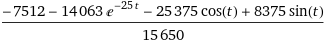

**Нужные объявления**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
sns.set_theme()

In [50]:
# общие константы
t0 = 0
T = 2
y0 = -3

**Функции применяемые для задачи**

In [42]:
def function(x, y):
    return -25*y - 40*np.cos(x) + 15*np.sin(x) - 12

def simple_euler(x_i, y_i, h, x_i_1):
    return y_i + h*function(x_i, y_i)

def true_solution(x):
    return (-7512 - 14063*np.exp(-25*x) - 25375*np.cos(x) + 8375*np.sin(x)) / 15650

def m_i(x):
    return - 40*np.cos(x) + 15*np.sin(x) - 12

def simple_adams(x_i, y_i, h, x_i_1):
    return (y_i + h/2*(-25*y_i + m_i(x_i) + m_i(x_i_1)))/(1 + h/2*25)

def method_runge(a, b, eps, y0, function, method, scale):
    h = 0.1
    h_2 = h / 2


    n = int((b - a) / h)
    n_2 = int((b - a) / h_2)
        
    n_2 = 2*n
    x_h = np.arange(a, b, h)
    x_h_2 = np.arange(a, b, h_2)
    y_list=[]
    y_2_list=[]
    #lmbd = lambda x, y: return y
    for i in range(x_h.shape[0]):
        if i==0:
            y_list = np.array([y0])
        else:
            y_list = np.append(y_list, method(x_h[i-1], y_list[i-1], h, x_h[i]))
            
    for i in range(x_h_2.shape[0]):
        if i==0:
            y_2_list = np.array([y0])
        else:
            y_2_list = np.append(y_2_list, method(x_h_2[i-1], y_2_list[i-1], h_2, x_h_2[i]))
            
              
    r = np.zeros((max(y_list.shape[0]*2, y_2_list.shape[0])))
    r = y_2_list[::2] - y_list    
    r = r / (2**scale - 1)
    history = []
    history.append(y_2_list)
    while (np.abs(r).max() > eps):
        #print(h)
        h = h_2
        h_2 = h / 2

        n = int((b - a) / h)
        n_2 = int((b - a) / h_2)
        
        n_2 = 2*n
        x_h = np.arange(a, b, h)
        x_h_2 = np.arange(a, b, h_2)
        
        y_list=y_2_list.copy()
        y_2_list=[]
        #lmbd = lambda x, y: return y

        for i in range(x_h_2.shape[0]):
            if i==0:
                y_2_list = np.array([y0])
            else:
                y_2_list = np.append(y_2_list, method(x_h_2[i-1], y_2_list[i-1], h_2, x_h_2[i]))
                
                
        r = np.zeros((max(y_list.shape[0]*2, y_2_list.shape[0])))
        r = y_2_list[::2] - y_list
        history.append(y_2_list)    
        r = r / (2**scale - 1)
    return x_h_2, y_2_list, h, r, n_2, history

### Решения с заданным шагом

In [59]:
h_result = 0.01

#### Решение с помощью Эйлера

In [60]:
x_result = np.arange(t0, T, h_result)
y_result=[]
for i in range(x_result.shape[0]):
    if i==0:
        y_result = np.array([y0])
    else:
        y_result = np.append(y_result, simple_euler(x_result[i-1], y_result[i-1], h_result, x_result[i]))

In [62]:
print(f"Шаг : {h_result}")
print(f"Точность : {np.abs(y_result - true_solution(x_result)).max()}")

Шаг : 0.01
Точность : 0.04603350169732323


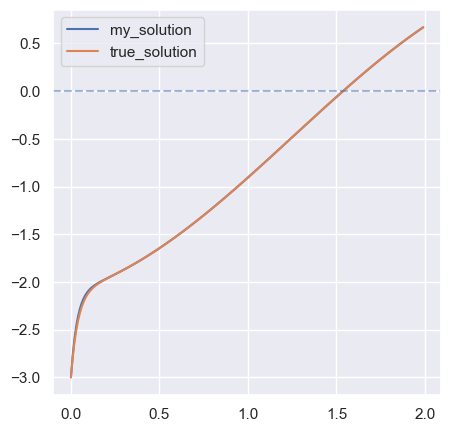

In [64]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(x_result, y_result, label='my_solution')
ax.plot(x_result, true_solution(x_result), label='true_solution')
ax.axhline(0, alpha=0.5, ls='--')
ax.legend()

#### Решение с помощью Адамса

In [65]:
x_result = np.arange(t0, T, h_result)
y_result=[]
for i in range(x_result.shape[0]):
    if i==0:
        y_result = np.array([y0])
    else:
        y_result = np.append(y_result, simple_adams(x_result[i-1], y_result[i-1], h_result, x_result[i]))

In [66]:
print(f"Шаг : {h_result}")
print(f"Точность : {np.abs(y_result - true_solution(x_result)).max()}")

Шаг : 0.01
Точность : 0.0017333829972501213


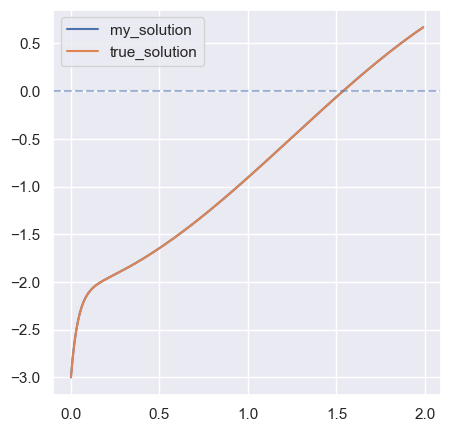

In [67]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(x_result, y_result, label='my_solution')
ax.plot(x_result, true_solution(x_result), label='true_solution')
ax.axhline(0, alpha=0.5, ls='--')
ax.legend()

### Решения с заданными точностями

In [51]:
eps = 10**(-4)

#### Решение с помощью Эйлера

In [43]:
x_result, y_result, h_result, r_result, n_result, history = method_runge(t0, T, eps, y0, function, simple_euler, 1)

In [44]:
print(f"Нужный для точности {eps} шаг : {h_result}")
print(f"Количество шагов для данного шага : {n_result}")
print(f"Точность до уточнения по правилу Рунге : {np.abs(y_result - true_solution(x_result)).max()}")
print(f"Точность после уточнения по правилу Рунге : \
      {np.abs(y_result[::2] + r_result[::] - true_solution(x_result)[::2]).max()}")

Нужный для точности 0.0001 шаг : 2.44140625e-05
Количество шагов для данного шага : 163840
Точность до уточнения по правилу Рунге : 5.020002700195647e-05
Точность после уточнения по правилу Рунге :       1.4288682681495857e-08


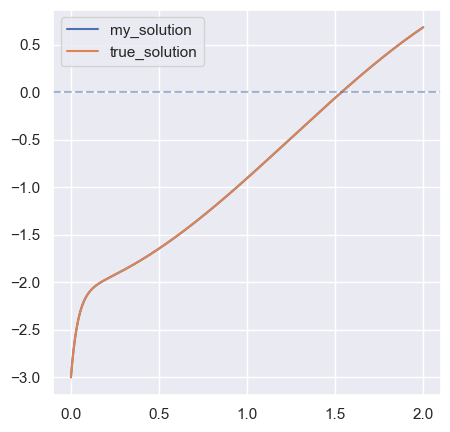

In [45]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
#x = np.linspace(t0,T,i.shape[0])
ax.plot(x_result, y_result, label='my_solution')
#ax.plot(x_result, scipy.integrate.odeint(function, y0, x_result), label='true_solution')
ax.plot(x_result, true_solution(x_result), label='true_solution')
ax.axhline(0, alpha=0.5, ls='--')
ax.legend()

#### Решение с помощью Адамса:
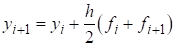
Пусть $m_i = -40cos(t_i) + 15sin(t_i) - 12) $
Тогда метод Адамса можно переписать в явном виде:  
$ y_{i+1} = \frac{y_i + \frac{h}{2}(-25y_i + m_i + m_{i+1})}{1 + \frac{h}{2}*25}$

In [47]:
x_result, y_result, h_result, r_result, n_result, history = method_runge(t0, T, eps, y0, function, simple_adams, 2)

In [48]:
print(f"Нужный для точности {eps} шаг : {h_result}")
print(f"Количество шагов для данного шага : {n_result}")
print(f"Точность до уточнения по правилу Рунге : {np.abs(y_result - true_solution(x_result)).max()}")
print(f"Точность после уточнения по правилу Рунге : \
      {np.abs(y_result[::2] + r_result[::] - true_solution(x_result)[::2]).max()}")

Нужный для точности 0.0001 шаг : 0.003125
Количество шагов для данного шага : 1280
Точность до уточнения по правилу Рунге : 4.2033555346598916e-05
Точность после уточнения по правилу Рунге :       2.9333928175390156e-08


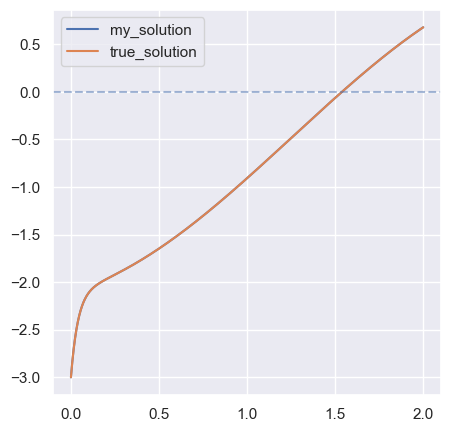

In [49]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
#x = np.linspace(t0,T,i.shape[0])
ax.plot(x_result, y_result, label='my_solution')
#ax.plot(x_result, scipy.integrate.odeint(function, y0, x_result), label='true_solution')
ax.plot(x_result, true_solution(x_result), label='true_solution')
ax.axhline(0, alpha=0.5, ls='--')
ax.legend()

***Очевидно***, что решения в п.2 дают лучшю точность, тк применяется правило Рунге.  
***Очевидно***, что методу Адамса потребовался меньший шаг, тк он 2 порядка точности.  
***Очевидно***, что в п2 метод Адамса дает большую точность на одинаковом шаге, тк он 2 порядка точности, а метод Эйлера - первого.

## Задача 7.2
Дана задача Коши для двух систем обыкновенных дифференциальных уравнений с постоянными коэффициентами  
$$
\left\{\begin{matrix}
Y'(t) = AY(t) & Y(0) = Y_0
\\
Z'(t) = BZ(t) & Z(0) = Z_0
\end{matrix}\right.
$$   
где A  и B  – заданные матрицы, 
Y0, Z0   -  заданные векторы.  
Исследовать поведение решения cистем уравнений 

#### Порядок решения задачи:
1. Используя встроенную функцию для нахождения собственных чисел матриц A и B,  найти коэффициенты жесткости обеих систем. Установить какая  задача является жесткой.
2. Составить программу-функцию нахождения решения системы ОДУ 1 порядка с постоянными коэффициентами по явному методу Эйлера. 
3. Численно решить обе задачи  на отрезке [0,1] c шагом h=0.01 явным методом Эйлера. Определить, для какой из задач явный метод неустойчив при данном шаге h.
4. Составить программу-функцию нахождения решения системы ОДУ 1 порядка с постоянными коэффициентами по неявному методу Эйлера. Используя составленную программу, найти решение жесткой задачи с шагом h=0.01. Построить графики компонент полученного решения.
5. Найти решение  жесткой задачи с заданной точностью $\varepsilon={10}^{-6}$. Построить графики  компонент решения и сравнить с п.4.   


A = 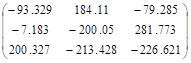
B = 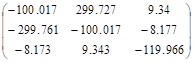
Y0 = 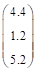
Z0 = 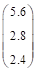

In [109]:
A = np.array([
    [-93.329, 184.11, -79.285],
    [-7.183, -200.05, 281.773],
    [200.327, -213.428, -226.621]
])
B = np.array([
    [-100.017, 299.727, 9.34],
    [-299.761, -100.017, -8.177],
    [-8.173, 9.343, -119.966]
])
y0 = np.array([4.4, 1.2, 5.2])
z0 = np.array([5.6, 2.8, 2.4])

In [110]:
from scipy.linalg import eigvals

In [111]:
print(f"Собственные значения A:", *eigvals(A))
print(f"Собственные значения B:", *eigvals(B))

Собственные значения A: (-19.99985556379834+0j) (-250.00007221810102+299.9999636639014j) (-250.00007221810102-299.9999636639014j)
Собственные значения B: (-99.99996207076775+299.9997990468886j) (-99.99996207076775-299.9997990468886j) (-120.00007585846447+0j)


In [112]:
print(f"Число жесткости A:", np.abs(eigvals(A).real).max() / np.abs(eigvals(A).real).min())
print(f"Число жесткости B:", np.abs(eigvals(B).real).max() / np.abs(eigvals(B).real).min())

Число жесткости A: 12.500093884209102
Число жесткости B: 1.200001213735892


Задача A является более жесткой по сравнению с задачей B.  

### Решение для фиксированного шага
#### Решение с помощью явного метода Эйлера


In [172]:
def simple_euler_mult(matrix ,x_i, y_i, h, x_i_1):
    return matrix @ y_i

***Задача А***

In [119]:
h_result = 0.01
t0 = 0
T = 1

In [141]:
A_mult = (np.eye(A.shape[0]) + h_result*A)

In [143]:
x_result = np.arange(t0, T, h_result)
y_result=[]
for i in range(x_result.shape[0]):
    if i==0:
        y_result.append(y0)
    else:
        #print(y_result)
        #print(simple_euler_mult(A, x_result[i-1], y_result[i-1], h_result, x_result[i]))
        y_result.append(simple_euler_mult(A_mult, x_result[i-1], y_result[i-1], h_result, x_result[i]))      

In [160]:
y1 = [x[0] for x in y_result]
y2 = [x[1] for x in y_result]
y3 = [x[2] for x in y_result]

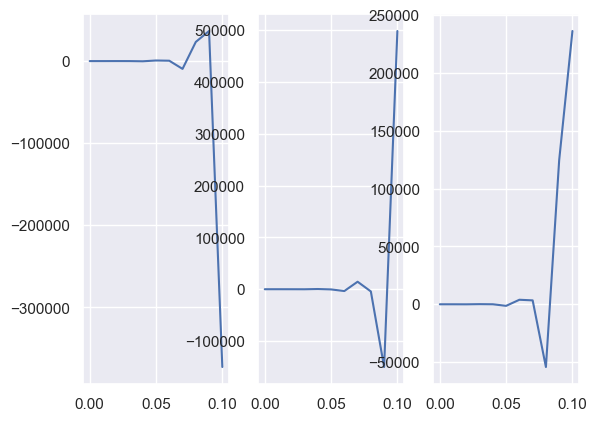

In [169]:
fig, ax = plt.subplots(1, 3)
ax[0].plot(x_result[:11], y1[:11])
ax[1].plot(x_result[:11], y2[:11])
ax[2].plot(x_result[:11], y3[:11])

Как видим, метод развалился

***Задача В***

In [209]:
h_result = 0.01
t0 = 0
T = 1

In [210]:
B_mult = (np.eye(B.shape[0]) + h_result*B)

In [211]:
x_result = np.arange(t0, T, h_result)
z_result=[]
for i in range(x_result.shape[0]):
    if i==0:
        z_result.append(z0)
    else:
        #print(y_result)
        #print(simple_euler_mult(A, x_result[i-1], y_result[i-1], h_result, x_result[i]))
        z_result.append(simple_euler_mult(B_mult, x_result[i-1], z_result[i-1], h_result, x_result[i]))      

In [212]:
z1 = [x[0] for x in z_result]
z2 = [x[1] for x in z_result]
z3 = [x[2] for x in z_result]

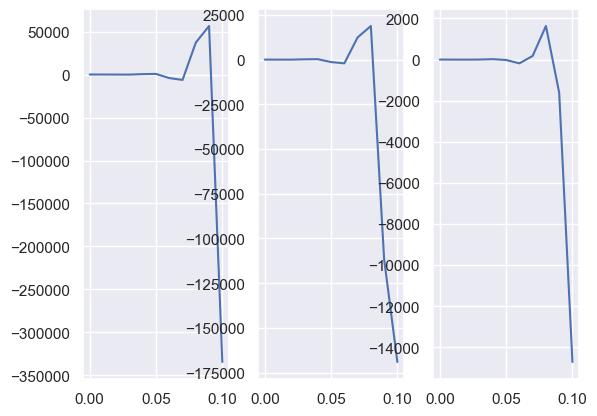

In [213]:
fig, ax = plt.subplots(1, 3)
ax[0].plot(x_result[:11], z1[:11])
ax[1].plot(x_result[:11], z2[:11])
ax[2].plot(x_result[:11], z3[:11])

Как видим, метод тоже развалился

#### Решение с помощью неявного метода Эйлера
Отличие методов от явных будет только в матрице, умножаемой на $Y_i$

***Задача А***

In [422]:
h_result = 0.01
t0 = 0
T = 1

In [423]:
A_mult = np.linalg.inv((np.eye(A.shape[0]) - h_result*A))

In [424]:
x_result = np.arange(t0, T, h_result)
y_result=[]
for i in range(x_result.shape[0]):
    if i==0:
        y_result.append(y0)
    else:
        #print(y_result)
        #print(simple_euler_mult(A, x_result[i-1], y_result[i-1], h_result, x_result[i]))
        y_result.append(simple_euler_mult(A_mult, x_result[i-1], y_result[i-1], h_result, x_result[i]))      

In [425]:
#Встроенное решение СОДУ
def odient_func(y, t):
    y1, y2, y3 = y
    dydt = [-93.329*y1 +  184.11*y2 - 79.285*y3,
            -7.183*y1 - 200.05*y2 + 281.773*y3,
            200.327*y1   -213.428*y2 -226.621*y3
           ]
    return dydt

real_sol = scipy.integrate.odeint(odient_func, y0, x_result)

In [426]:
y1 = [x[0] for x in y_result]
y2 = [x[1] for x in y_result]
y3 = [x[2] for x in y_result]

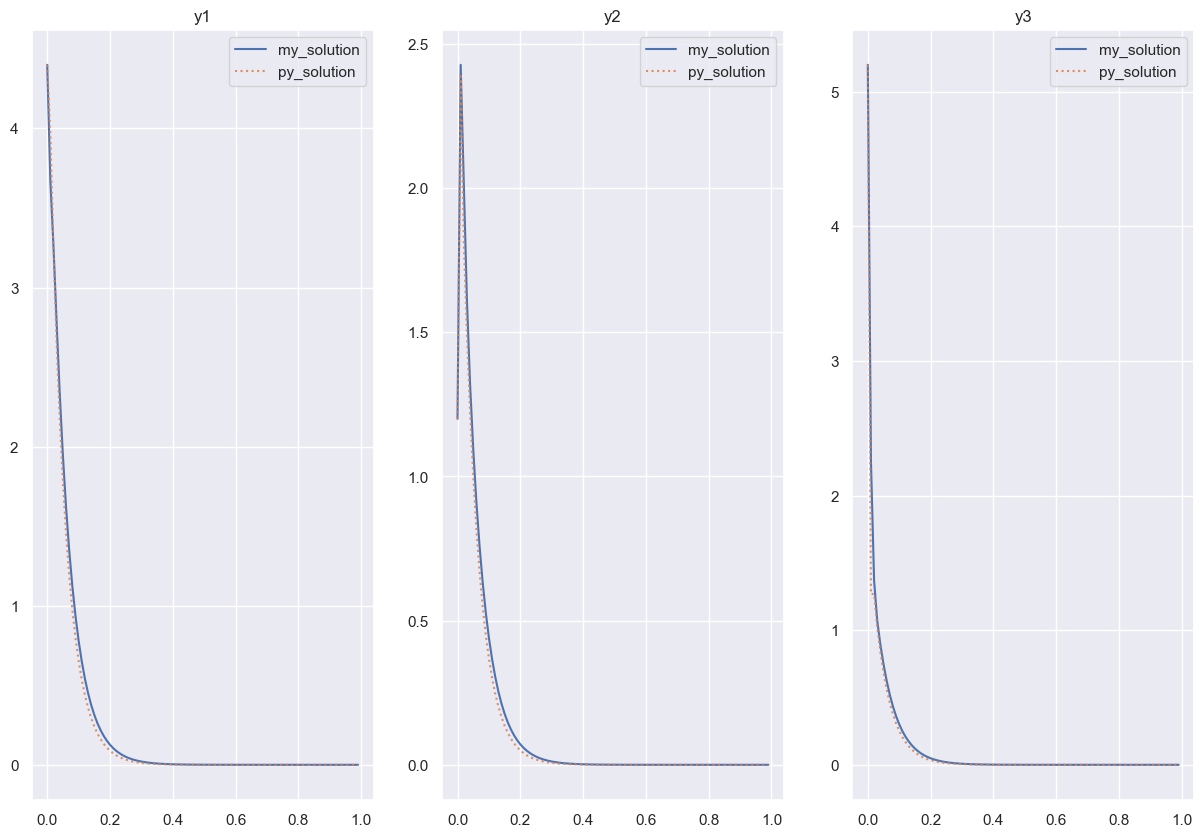

In [430]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

ax[0].plot(x_result, y1, label='my_solution')
ax[1].plot(x_result, y2, label='my_solution')
ax[2].plot(x_result, y3, label='my_solution')

ax[0].plot(x_result, real_sol[:, 0], label='py_solution', ls=':', alpha=0.9)
ax[1].plot(x_result, real_sol[:, 1], label='py_solution', ls=':', alpha=0.9)
ax[2].plot(x_result, real_sol[:, 2], label='py_solution', ls=':', alpha=0.9)

ax[0].set_title('y1')
ax[1].set_title('y2')
ax[2].set_title('y3')
for axs in ax:
    axs.legend()

##### Задача В

In [431]:
h_result = 0.01
t0 = 0
T = 1

In [432]:
B_mult = np.linalg.inv((np.eye(B.shape[0]) - h_result*B))

In [433]:
x_result = np.arange(t0, T, h_result)
z_result=[]
for i in range(x_result.shape[0]):
    if i==0:
        z_result.append(z0)
    else:
        #print(y_result)
        #print(simple_euler_mult(A, x_result[i-1], y_result[i-1], h_result, x_result[i]))
        z_result.append(simple_euler_mult(B_mult, x_result[i-1], z_result[i-1], h_result, x_result[i]))      

In [434]:
#Встроенное решение СОДУ
def odient_func(y, t):
    y1, y2, y3 = y
    dydt = [-100.017*y1 +  299.727*y2 + 9.34*y3,
            -299.761*y1 - 100.017*y2 - 8.177*y3,
            -8.173*y1 + 9.343*y2 - 119.966*y3
           ]
    return dydt


real_sol = scipy.integrate.odeint(odient_func, z0, x_result)

In [435]:
z1 = [x[0] for x in z_result]
z2 = [x[1] for x in z_result]
z3 = [x[2] for x in z_result]

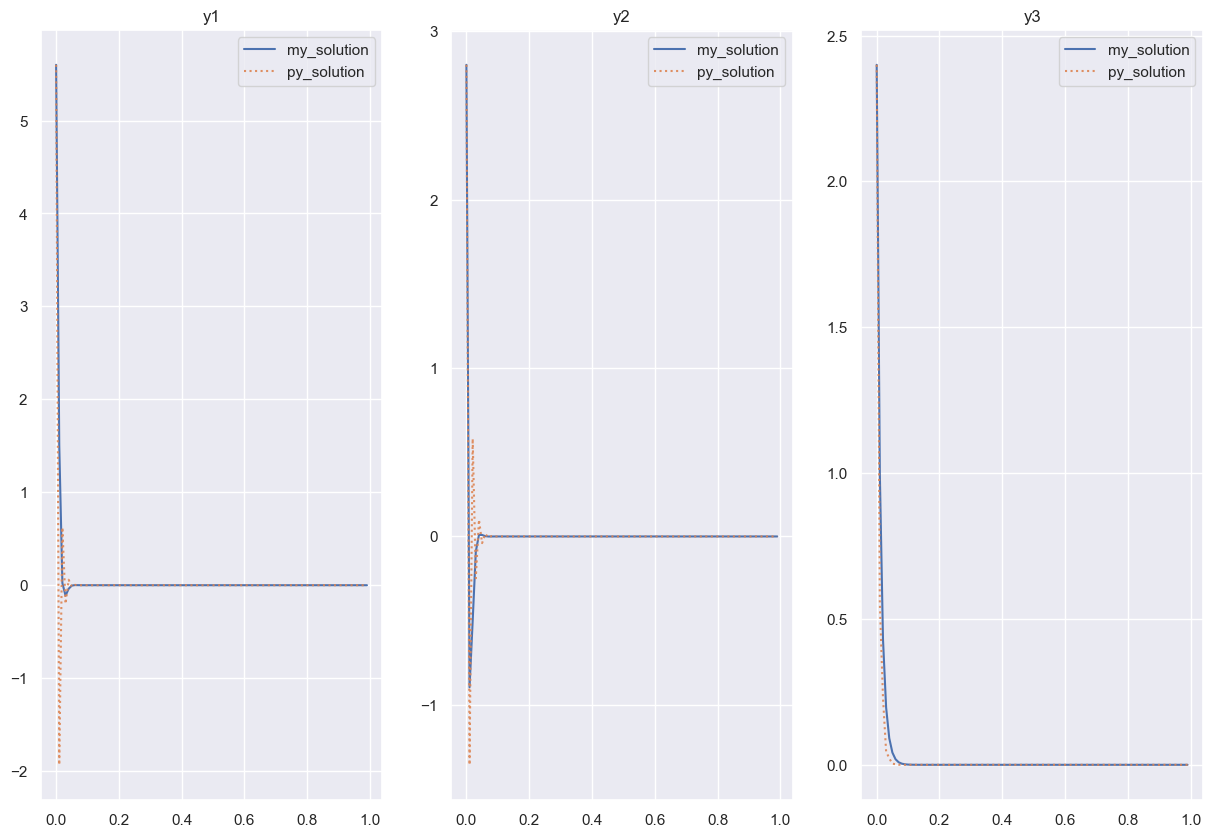

In [436]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

ax[0].plot(x_result, z1, label='my_solution')
ax[1].plot(x_result, z2, label='my_solution')
ax[2].plot(x_result, z3, label='my_solution')

ax[0].plot(x_result, real_sol[:, 0], label='py_solution', ls=':', alpha=0.9)
ax[1].plot(x_result, real_sol[:, 1], label='py_solution', ls=':', alpha=0.9)
ax[2].plot(x_result, real_sol[:, 2], label='py_solution', ls=':', alpha=0.9)

ax[0].set_title('y1')
ax[1].set_title('y2')
ax[2].set_title('y3')
for axs in ax:
    axs.legend()

## Используем метод Рунге

In [437]:
def method_runge_mult(matrix, a, b, eps, y0, function, method, scale):
    h = 0.1
    h_2 = h / 2

    n = int((b - a) / h)
    n_2 = int((b - a) / h_2)
        
    matrix_mult = (np.eye(matrix.shape[0]) + h*matrix)
    matrix_mult_2 = (np.eye(matrix.shape[0]) + h_2*matrix)
    n_2 = 2*n
    x_h = np.arange(a, b, h)
    x_h_2 = np.arange(a, b, h_2)
    y_list=[]
    y_2_list=[]
    
    for i in range(x_h.shape[0]):
        if i==0:
            y_list.append(y0)
        else:
            y_list.append(method(matrix, x_h[i-1], y_list[i-1], h, x_h[i]))      
            
    for i in range(x_h_2.shape[0]):
        if i==0:
            y_2_list.append(y0)
        else:
            y_2_list.append(method(matrix_mult_2, x_h_2[i-1], y_2_list[i-1], h_2, x_h_2[i])) 
              
    y_list = np.array(y_list)
    y_2_list = np.array(y_2_list)
    
    r = np.zeros((max(y_list.shape[0]*2, y_2_list.shape[0])))
    r = y_2_list[::2] - y_list    
    r = r / (2**scale - 1)
    r1 = np.zeros_like(r)
    while ((np.linalg.norm(np.abs(r), ord=2) > eps) and h > 1e-6):
        #print(np.linalg.norm(np.abs(r), ord=2))
        #print(h)
        #print(x_h)
        #print(x_h_2[::2])
        h = h_2
        h_2 = h / 2

        #print(x_h)
        #print(x_h_2)
        
        n = int((b - a) / h)
        n_2 = int((b - a) / h_2)
        
        n_2 = 2*n
        x_h = np.arange(a, b, h)
        x_h_2 = np.arange(a, b, h_2)
        
        matrix_mult_2 = (np.eye(matrix.shape[0]) + h_2*matrix)
        
        y_list=y_2_list.copy()
        y_2_list=[]
        for i in range(x_h_2.shape[0]):
            if i==0:
                y_2_list.append(y0)
            else:
                y_2_list.append(method(matrix_mult_2, x_h_2[i-1], y_2_list[i-1], h_2, x_h_2[i])) 

        y_list = np.array(y_list)
        y_2_list = np.array(y_2_list)
               
        r1, r = r, r1
        r = np.zeros((max(y_list.shape[0]*2, y_2_list.shape[0])))
        r = y_2_list[::2] - y_list
        #print(r)
        r = r / (2**scale - 1)
        
        
    return x_h_2, y_2_list, h, r, n_2

##### Задача А

In [438]:
x_result, y_result, h_result, r_result, n_result = method_runge_mult(A, t0, T, 1e-3, y0, function, simple_euler_mult, 1)

In [439]:
print(h_result)

7.62939453125e-07


In [442]:
#Встроенное решение СОДУ
def odient_func(y, t):
    y1, y2, y3 = y
    dydt = [-93.329*y1 +  184.11*y2 - 79.285*y3,
            -7.183*y1 - 200.05*y2 + 281.773*y3,
            200.327*y1   -213.428*y2 -226.621*y3
           ]
    return dydt

real_sol = scipy.integrate.odeint(odient_func, y0, x_result)

In [443]:
y1 = [x[0] for x in y_result]
y2 = [x[1] for x in y_result]
y3 = [x[2] for x in y_result]

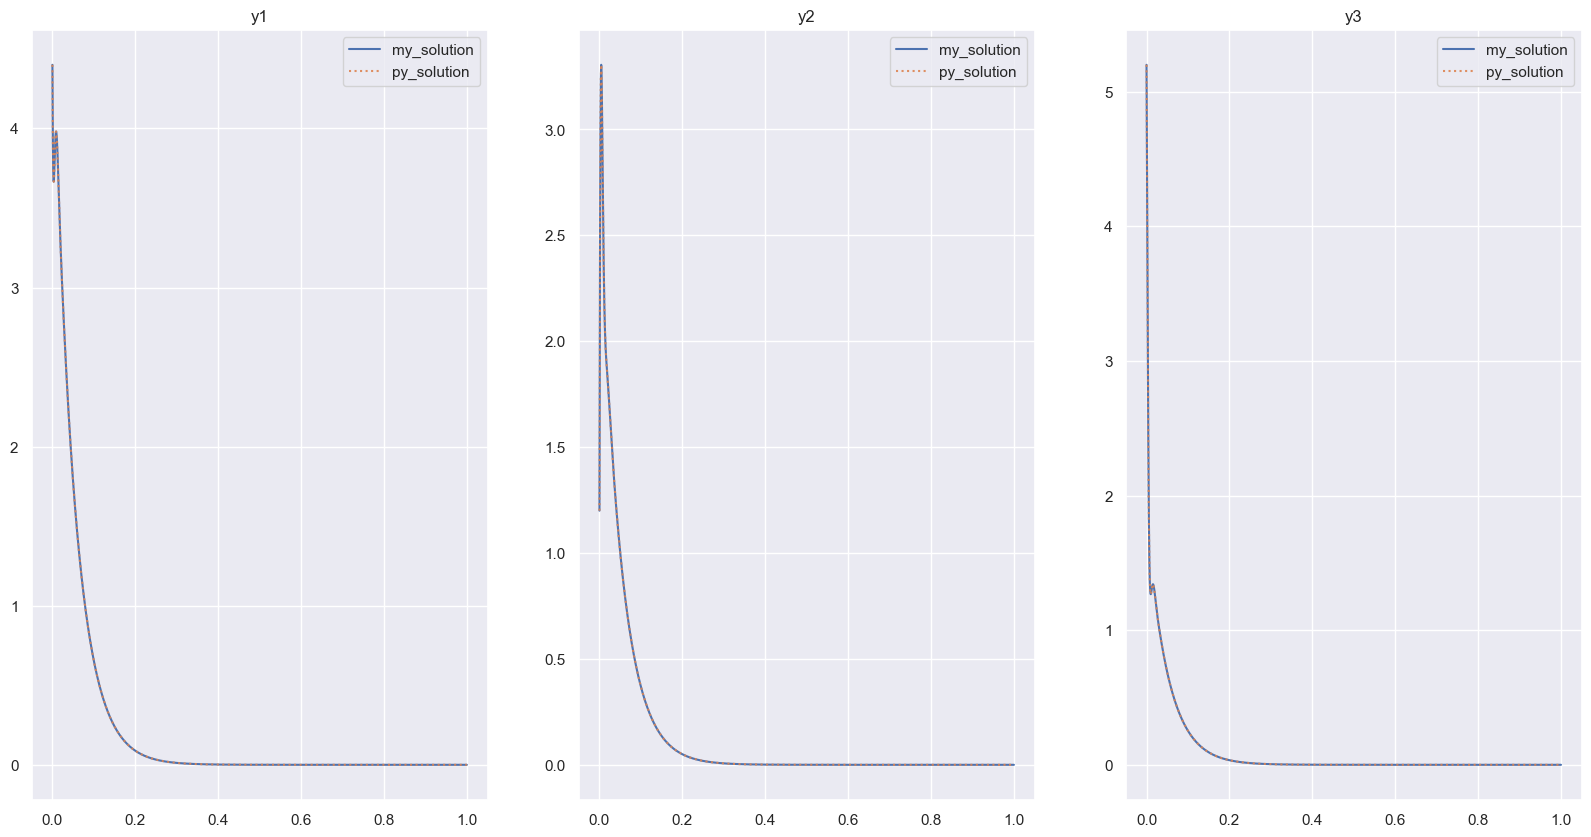

In [444]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].plot(x_result, y1, label='my_solution')
ax[1].plot(x_result, y2, label='my_solution')
ax[2].plot(x_result, y3, label='my_solution')

ax[0].plot(x_result, real_sol[:, 0], label='py_solution', ls=':', alpha=0.9)
ax[1].plot(x_result, real_sol[:, 1], label='py_solution', ls=':', alpha=0.9)
ax[2].plot(x_result, real_sol[:, 2], label='py_solution', ls=':', alpha=0.9)

ax[0].set_title('y1')
ax[1].set_title('y2')
ax[2].set_title('y3')
for axs in ax:
    axs.legend()

##### Задача B

In [445]:
x_result, z_result, h_result, r_result, n_result = method_runge_mult(B, t0, T, 1e-3, z0, function, simple_euler_mult, 1)

In [446]:
print(h_result)

7.62939453125e-07


In [447]:
#Встроенное решение СОДУ
def odient_func(y, t):
    y1, y2, y3 = y
    dydt = [-100.017*y1 +  299.727*y2 + 9.34*y3,
            -299.761*y1 - 100.017*y2 - 8.177*y3,
            -8.173*y1 + 9.343*y2 - 119.966*y3
           ]
    return dydt


real_sol = scipy.integrate.odeint(odient_func, z0, x_result)

In [448]:
z1 = [x[0] for x in z_result]
z2 = [x[1] for x in z_result]
z3 = [x[2] for x in z_result]

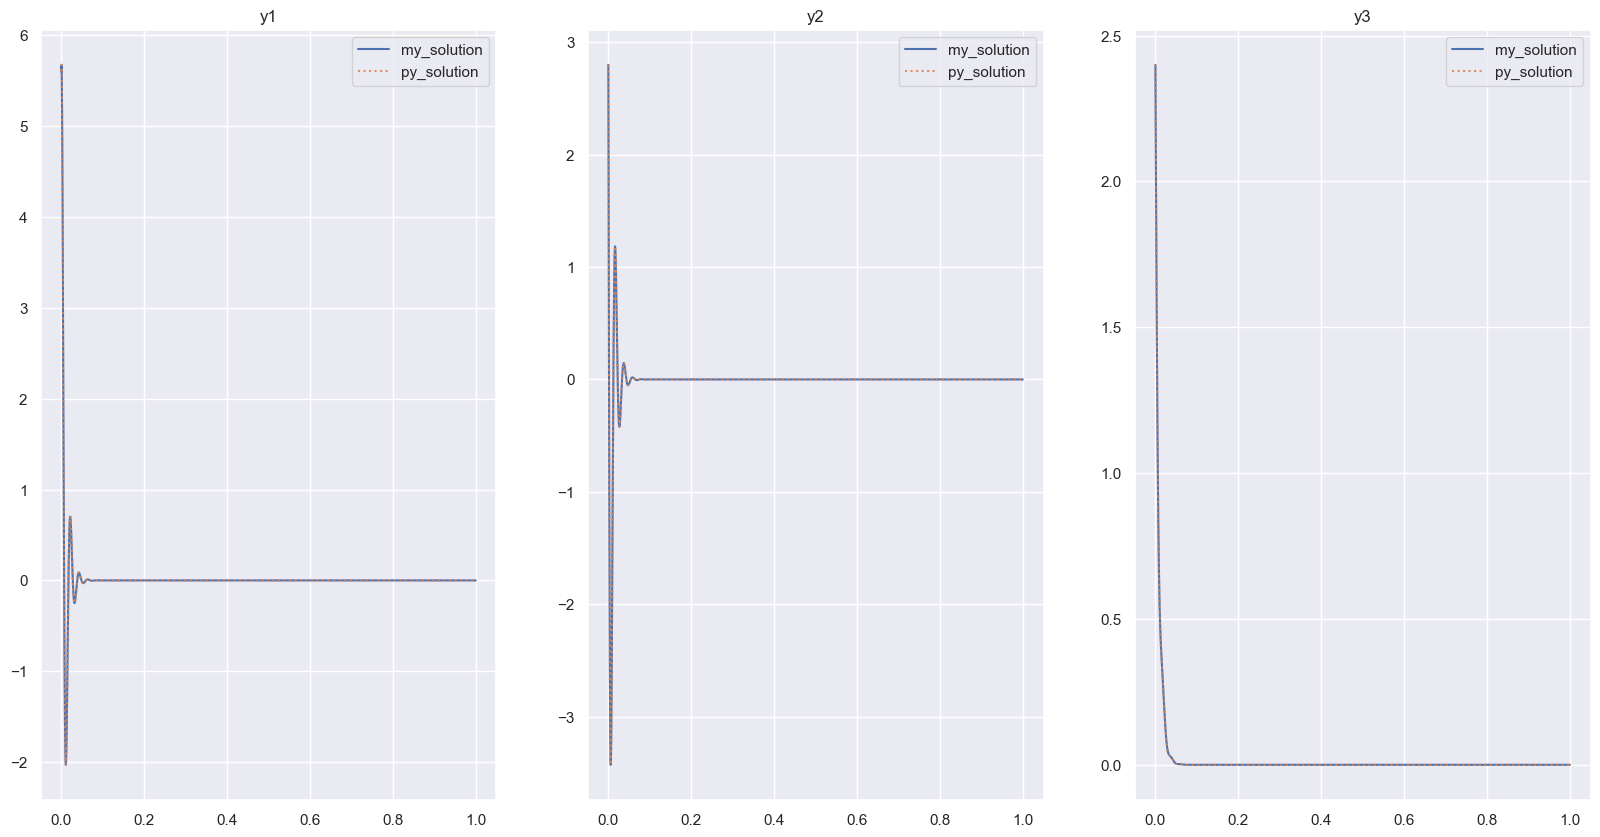

In [449]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].plot(x_result, z1, label='my_solution')
ax[1].plot(x_result, z2, label='my_solution')
ax[2].plot(x_result, z3, label='my_solution')

ax[0].plot(x_result, real_sol[:, 0], label='py_solution', ls=':', alpha=0.9)
ax[1].plot(x_result, real_sol[:, 1], label='py_solution', ls=':', alpha=0.9)
ax[2].plot(x_result, real_sol[:, 2], label='py_solution', ls=':', alpha=0.9)


ax[0].set_title('y1')
ax[1].set_title('y2')
ax[2].set_title('y3')
for axs in ax:
    axs.legend()